In [2]:
import numpy as np
import os 
import pandas as pd 
import random 
import shutil
import sys  
import matplotlib.pyplot as plt

chapters = ['chapter01', 'chapter02']

for chapter in chapters:
    base_path = os.path.abspath(f'../code/{chapter}/')
    sys.path.append(base_path)


import tic_tac_toe as ttt 
import ten_armed_testbed as c2

# auto load the changes of referenced codes
%load_ext autoreload
%autoreload 2

In [3]:
# if new methods are created in referenced codes, run the following code.
%reload_ext autoreload

代码来自https://github.com/ShangtongZhang/reinforcement-learning-an-introduction

## chapter 1

In [8]:
state = ttt.State()
print(f'state.data=\n{state.data}')
print(f'state.hash_val={state.hash_val}')
print(f'state.is_end()={state.is_end()}') 
state.print_state()

state.data=
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
state.hash_val=None
state.is_end()=False
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------


In [11]:
states = ttt.get_all_states() 
print(len(states))

5478


In [15]:
# check hash_val
state = ttt.State()
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) )
state = state.next_state(0, 0, 1)
print(state.hash(), np.sum([np.power(3, i) for i in range(9)]) + np.power(3, 8))

9841.0 9841
16402.0 16402


In [16]:
i = 0 
for key, value in states.items():
    i = i+1
    if i>=11: break
    state, is_end = value
    print('-'*20, i, key, is_end, '-'*20)
    state.print_state()

-------------------- 1 9841.0 False --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 False --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 False --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 False --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 False --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 False --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0 False ----------

In [28]:
## check player

player = ttt.Player(epsilon=0)
player.set_symbol(1)
print(f'len(player.estimations)={len(player.estimations)}') 
states = ttt.get_all_states() 

i = 0 
for hash_val, value in player.estimations.items():
    i = i+1
    if i>=11: break
    print('-'*20, i, hash_val, value, '-'*20)
    states[hash_val][0].print_state()

len(player.estimations)=5478
-------------------- 1 9841.0 0.5 --------------------
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 2 16402.0 0.5 --------------------
-------------
| * | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 3 14215.0 0.5 --------------------
-------------
| * | x | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 4 14944.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 5 14701.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 6 14782.0 0.5 --------------------
-------------
| * | x | * | 
-------------
| x | * | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
-------------------- 7 14755.0

In [24]:
ttt.train(int(1e5))

Epoch 500, player 1 winrate: 0.21, player 2 winrate: 0.04
Epoch 1000, player 1 winrate: 0.24, player 2 winrate: 0.04
Epoch 1500, player 1 winrate: 0.19, player 2 winrate: 0.04
Epoch 2000, player 1 winrate: 0.19, player 2 winrate: 0.06
Epoch 2500, player 1 winrate: 0.16, player 2 winrate: 0.05
Epoch 3000, player 1 winrate: 0.14, player 2 winrate: 0.04
Epoch 3500, player 1 winrate: 0.13, player 2 winrate: 0.04
Epoch 4000, player 1 winrate: 0.13, player 2 winrate: 0.04
Epoch 4500, player 1 winrate: 0.15, player 2 winrate: 0.05
Epoch 5000, player 1 winrate: 0.14, player 2 winrate: 0.05
Epoch 5500, player 1 winrate: 0.14, player 2 winrate: 0.04
Epoch 6000, player 1 winrate: 0.13, player 2 winrate: 0.04
Epoch 6500, player 1 winrate: 0.12, player 2 winrate: 0.04
Epoch 7000, player 1 winrate: 0.11, player 2 winrate: 0.03
Epoch 7500, player 1 winrate: 0.11, player 2 winrate: 0.03
Epoch 8000, player 1 winrate: 0.10, player 2 winrate: 0.03
Epoch 8500, player 1 winrate: 0.10, player 2 winrate: 0.0

Epoch 69000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 69500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 70000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 70500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 71000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 71500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 72000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 72500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 73000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 73500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 74000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 74500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 75000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 75500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 76000, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 76500, player 1 winrate: 0.03, player 2 winrate: 0.02
Epoch 77000, player 1 winrate: 0.03, pla

In [27]:
ttt.compete(int(1e3))

1000 turns, player 1 win 0.00, player 2 win 0.00


In [47]:
ttt.play()

-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
| 0 | 0 | 0 | 
-------------
Input your position:x
-------------
| 0 | 0 | 0 | 
-------------
| 0 | x | 0 | 
-------------
| 0 | * | 0 | 
-------------
Input your position:w
-------------
| x | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| 0 | * | 0 | 
-------------
Input your position:c
-------------
| x | * | 0 | 
-------------
| 0 | x | 0 | 
-------------
| x | * | * | 
-------------
Input your position:d
You lose!
Do you want to play again(y/n):n


## chapter 2

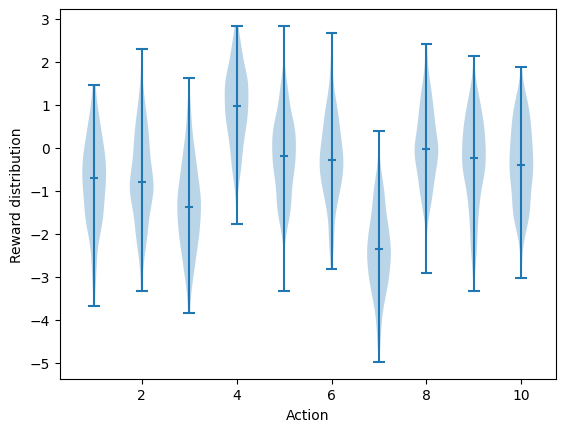

In [33]:
c2.figure_2_1(show=True) 

(len(bandits), runs, time)=(3, 2000, 1000)


100%|██████████| 2000/2000 [02:20<00:00, 14.24it/s]


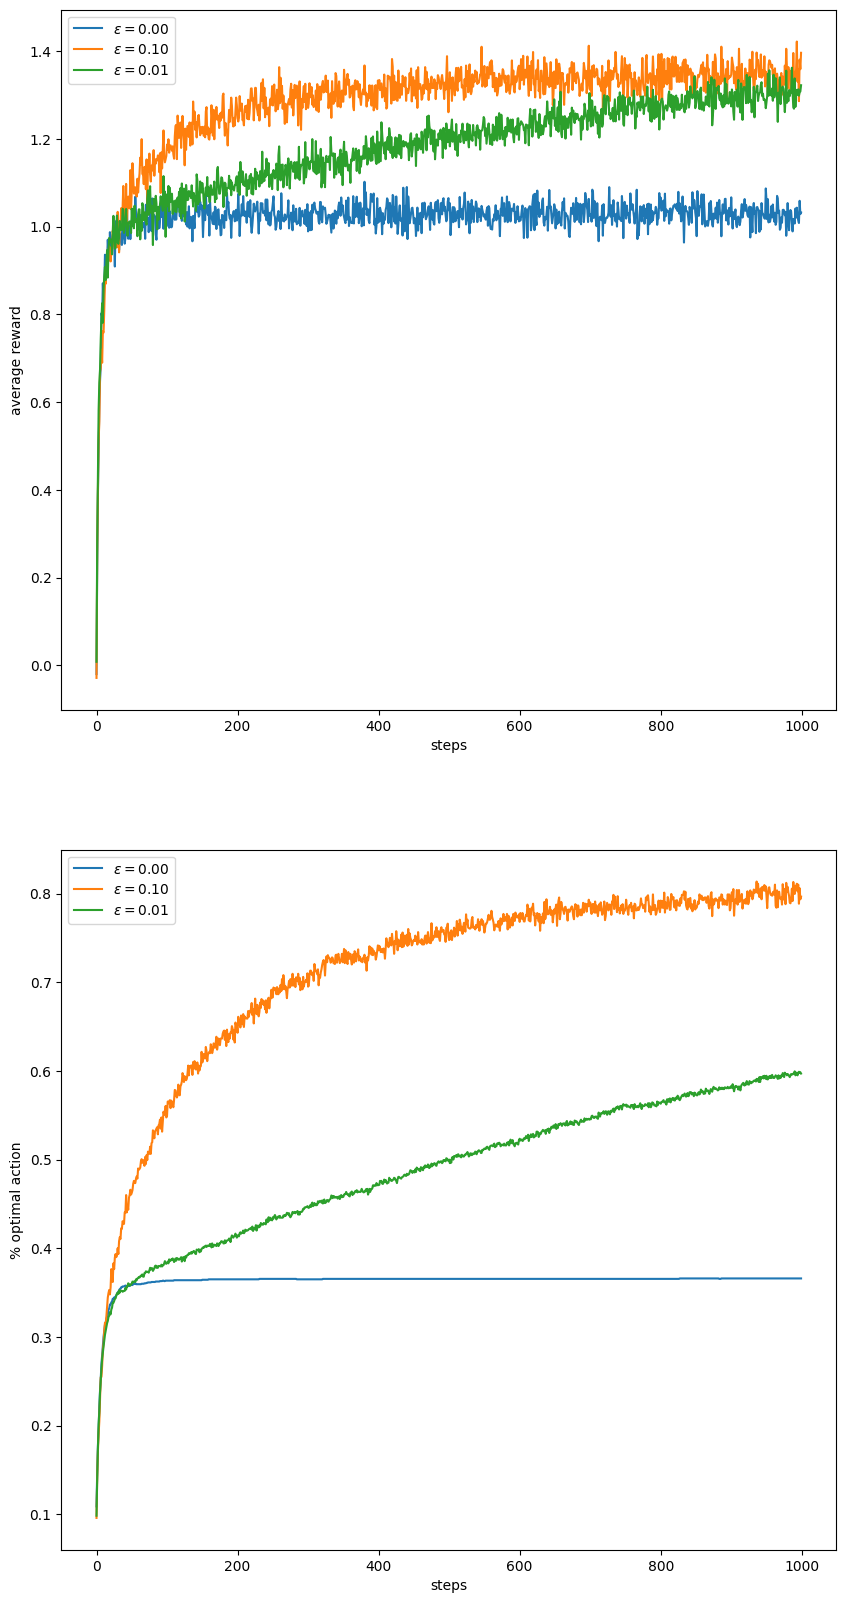

In [38]:
c2.figure_2_2(show=True) 

100%|██████████| 2000/2000 [02:16<00:00, 14.66it/s]


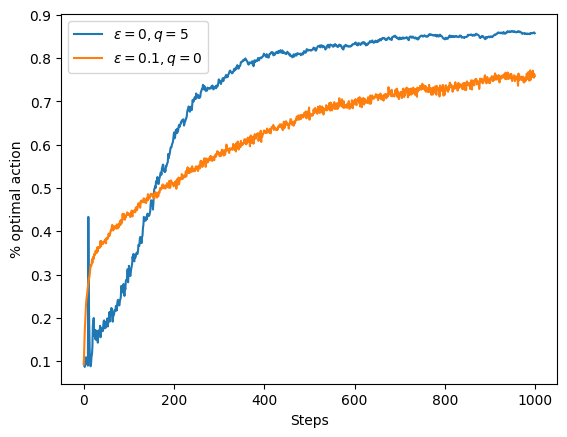

In [55]:
c2.figure_2_3(show=True) 

100%|██████████| 2000/2000 [02:16<00:00, 14.63it/s]


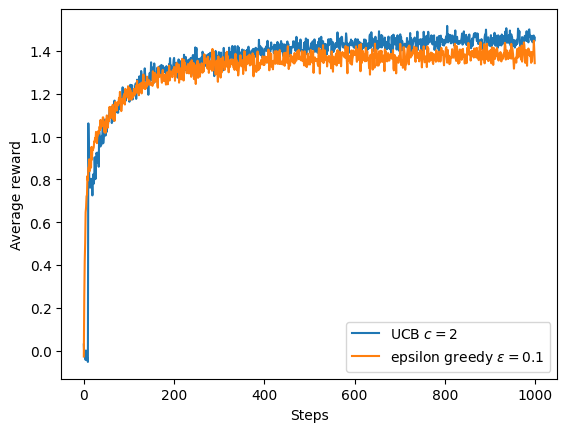

In [56]:
c2.figure_2_4(show=True) 

100%|██████████| 2000/2000 [02:56<00:00, 11.32it/s]


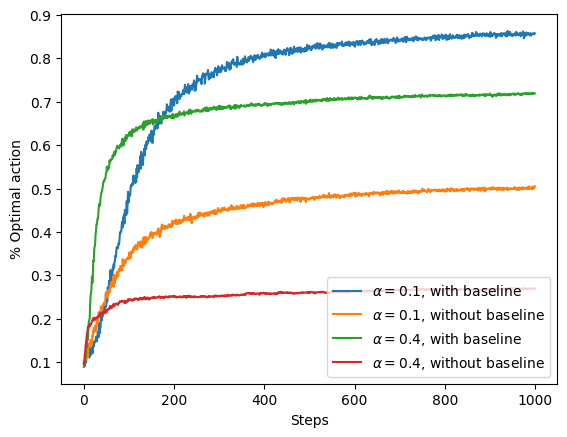

In [57]:
c2.figure_2_5(show=True) 

100%|██████████| 2000/2000 [02:21<00:00, 14.15it/s]


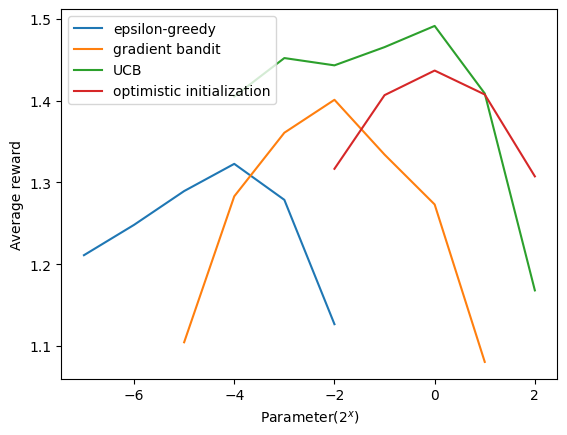

In [58]:
c2.figure_2_6(show=True) 

In [61]:
import gymnasium as gym
env = gym.make("CartPole-v1")

observation, info = env.reset(seed=42)
for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        observation, iennfo = env.reset()

env.close()

In [59]:
import gymnasium as gym
env = gym.make("LunarLander-v2", render_mode="human")
observation, info = env.reset()

for _ in range(1000):
    action = env.action_space.sample()  # agent policy that uses the observation and info
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()

env.close()

[autoreload of decorator failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 257, in check
    superreload(m, reload, self.old_objects)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 480, in superreload
    update_generic(old_obj, new_obj)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 377, in update_generic
    update(a, b)
  File "/usr/local/lib/python3.8/dist-packages/IPython/extensions/autoreload.py", line 289, in update_function
    setattr(old, name, getattr(new, name))
ValueError: ContextManager() requires a code object with 3 free vars, not 0
]
/usr/local/lib/python3.8/dist-packages/gymnasium/envs/registration.py:521: UserWarning: WARN: Overriding environment GymV26Environment-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/usr/local/lib/python3.8/dist-packages/gymnasium

The history saving thread hit an unexpected error (NameError("name 'fix' is not defined")).History will not be written to the database.


error: No available video device